In [1]:
#importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#import data
dataset = pd.read_csv('bj_housing.csv')
dataset = dataset[dataset['Area'] < 300]

print("the number of items in the data set =", len(dataset), "\n")

#printing first 10 elements of the dataset
print(dataset.head(10))

the number of items in the data set = 9959 

   Area  Value  Room  Living  School  Year  Floor
0   128    370     3       1       1  2004     21
1    68    330     1       2       1  2000      6
2   125    355     3       2       0  2003      5
3   129    278     2       2       0  2005     16
4   118    340     3       2       0  2003      6
5    58    300     1       1       0  2003     22
6   104    208     3       1       0  2001      6
7   198    380     3       2       0  2005      7
8    98    530     3       1       1  1990     12
9    97    465     2       1       1  1990     10


In [10]:
#splitting the dataset into input and output data and casting it to float32
x_train = tf.cast(dataset.iloc[:, [0]].values, tf.float32)
y_train = tf.cast(dataset.iloc[:, 1].values, tf.float32)

In [11]:
#hyperparameters
learning_rate = float(input("Enter Learning rate value: "))
training_epochs = int(input("Enter Training epochs value: "))

#prameters
display_step = int(input("Enter Display setup value: "))

Enter Learning rate value: 0.2
Enter Training epochs value: 100
Enter Display setup value: 1


In [12]:
#Training parameters
W = tf.Variable(np.random.randn(), name="Weight")
b = tf.Variable(np.random.randn(), name="Bias")

In [13]:
#Linear regression
def pred(x_train):
    return tf.add(tf.multiply(x_train, W), b)

In [14]:
#Error calculation
@tf.function
def cost():
    y_pred = pred(x_train)
    return tf.reduce_mean(tf.square(y_pred - y_train))

#Optimization
def optimizer():
    return tf.optimizers.Adam(learning_rate).minimize(cost, var_list=[W, b])


In [15]:
# Fit all training data
for epoch in range(training_epochs):
    optimizer()
    
    # Display logs per epoch step
    if (epoch) % display_step == 0:
        c = cost()
        print("Epoch:", '%04d' % (epoch+1), "error=", "{:.9f}".format(c), \
            "W=", W.numpy(), "b=", b.numpy())

print("Optimization Finished!")
print("-------------------------------------------------------------")

training_error = cost()
print("Training error=", training_error.numpy(), "W=", W.numpy(), "b=", b.numpy(), '\n')

Epoch: 0001 error= 214061.437500000 W= -0.8443144 b= -0.56985307
Epoch: 0002 error= 198826.609375000 W= -0.6443144 b= -0.36985308
Epoch: 0003 error= 184392.468750000 W= -0.4443144 b= -0.16985309
Epoch: 0004 error= 170759.015625000 W= -0.24431437 b= 0.030146912
Epoch: 0005 error= 157926.281250000 W= -0.04431437 b= 0.23014691
Epoch: 0006 error= 145894.265625000 W= 0.15568563 b= 0.43014693
Epoch: 0007 error= 134662.953125000 W= 0.35568565 b= 0.6301469
Epoch: 0008 error= 124232.390625000 W= 0.55568564 b= 0.8301469
Epoch: 0009 error= 114602.507812500 W= 0.7556856 b= 1.030147
Epoch: 0010 error= 105773.328125000 W= 0.9556856 b= 1.230147
Epoch: 0011 error= 97744.867187500 W= 1.1556857 b= 1.430147
Epoch: 0012 error= 90517.125000000 W= 1.3556857 b= 1.630147
Epoch: 0013 error= 84090.093750000 W= 1.5556858 b= 1.830147
Epoch: 0014 error= 78463.765625000 W= 1.7556858 b= 2.030147
Epoch: 0015 error= 73638.156250000 W= 1.9556859 b= 2.2301471
Epoch: 0016 error= 69613.257812500 W= 2.155686 b= 2.4301472
E

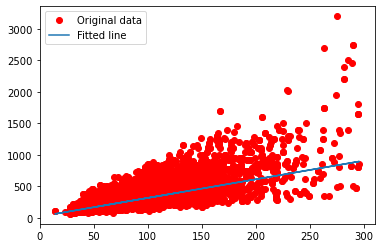

In [16]:
# Graphic display
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, pred(x_train), label='Fitted line')
plt.legend()
plt.show()

In [17]:
#model testing
home_val = pred(100)
print("The home price is", home_val.numpy())

The home price is 314.79877
